In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.neural_network import MLPClassifier

# Dataset Description
The  project  involves  the use  of  a  dataset  with  600k  training  data  and  57  features/data.In  the train and test data, features that belong to similar groupings are tagged as such in the feature names  (e.g.,  ind,  reg,  car,  calc).  In  addition,  feature  names  include  the  postfix  bin  to indicate binary  features  and  cat  to  indicate  categorical  features.  Features  without  these  designations are  either  continuous  or  ordinal.  **Values  of -1  indicate  that  the  feature  was  missing  from  the observation.** The target column signifieswhethera claim was filed for that policy holder..

In [63]:
data = pd.read_csv('auto_insurance.csv')
print(data.shape)

(595212, 59)


In [64]:
pd.set_option("display.max_columns",1000)

In [65]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [66]:
data.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [67]:
data.describe(include='all')

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829948,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375679,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.00000

In [68]:
datavc = data.target.value_counts()
print(datavc)

0    573518
1     21694
Name: target, dtype: int64


In [69]:
claim_dict = dict(data.target.value_counts())
sum_claims = sum(list(claim_dict.values()))
for i in claim_dict:
    claim_dict[i] = (claim_dict[i]/sum_claims)*100
    
print("percentage of claim rejected", claim_dict[0])
print("percentage of claim accepated", claim_dict[1])

percentage of claim rejected 96.3552482140817
percentage of claim accepated 3.6447517859182947


The target for prediction in the data here is highly skewed towards claims being rejected by the insurance company (more than **96%**) and merely 4% of claims are accepted. It is given that as per industry estimate, 1% reduction in claims lead to boost in about 10% of profit. So, 96% reduction in claims leads to 960% boost in profit, thus making it a **highly profitable business model.**

# Missing Data
As mentioned in the Data Description  
Values of -1 indicate that the feature was missing from the observation

In [70]:
data_new =  data.replace(-1,np.nan)
data_length = len(data_new)
null_percetange = dict(data_new.isna().sum())
for i in null_percetange:
    null_percetange[i] = round((null_percetange[i]/data_length)*100,4)
null_percetange

{'id': 0.0,
 'target': 0.0,
 'ps_ind_01': 0.0,
 'ps_ind_02_cat': 0.0363,
 'ps_ind_03': 0.0,
 'ps_ind_04_cat': 0.0139,
 'ps_ind_05_cat': 0.976,
 'ps_ind_06_bin': 0.0,
 'ps_ind_07_bin': 0.0,
 'ps_ind_08_bin': 0.0,
 'ps_ind_09_bin': 0.0,
 'ps_ind_10_bin': 0.0,
 'ps_ind_11_bin': 0.0,
 'ps_ind_12_bin': 0.0,
 'ps_ind_13_bin': 0.0,
 'ps_ind_14': 0.0,
 'ps_ind_15': 0.0,
 'ps_ind_16_bin': 0.0,
 'ps_ind_17_bin': 0.0,
 'ps_ind_18_bin': 0.0,
 'ps_reg_01': 0.0,
 'ps_reg_02': 0.0,
 'ps_reg_03': 18.1065,
 'ps_car_01_cat': 0.018,
 'ps_car_02_cat': 0.0,
 'ps_car_03_cat': 69.0898,
 'ps_car_04_cat': 0.0,
 'ps_car_05_cat': 44.7825,
 'ps_car_06_cat': 0.0,
 'ps_car_07_cat': 1.9302,
 'ps_car_08_cat': 0.0,
 'ps_car_09_cat': 0.0956,
 'ps_car_10_cat': 0.0,
 'ps_car_11_cat': 0.0,
 'ps_car_11': 0.0008,
 'ps_car_12': 0.0002,
 'ps_car_13': 0.0,
 'ps_car_14': 7.1605,
 'ps_car_15': 0.0,
 'ps_calc_01': 0.0,
 'ps_calc_02': 0.0,
 'ps_calc_03': 0.0,
 'ps_calc_04': 0.0,
 'ps_calc_05': 0.0,
 'ps_calc_06': 0.0,
 'ps_calc_07

As mentioned in the data that feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal.  
Using the above to sagregate the features in the data.

In [71]:
col_names = list(data.columns)
var_count_dict = dict.fromkeys(['binary_features',
                                'categorical_features','continuous/ordinal Features'],0)
binary_var = []
cat_var = []
cont_ordinal_var = []
for i in col_names:
    last = i[-3:]
    if last =='bin' or i == 'target':
        binary_var.append(i)
        var_count_dict['binary_features']+=1
    elif last == 'cat':
        cat_var.append(i)
        var_count_dict['categorical_features']+=1
    else:
        if i!='id':
            cont_ordinal_var.append(i)
            var_count_dict['continuous/ordinal Features']+=1
print(var_count_dict)

{'binary_features': 18, 'categorical_features': 14, 'continuous/ordinal Features': 26}


In [72]:
#\033[1m and \033[0m has been used to bold the text in print statement
print("\033[1mBinary Features:\033[0m",binary_var,'\n')
print("\033[1mCategorical Features:\033[0m",cat_var,'\n')
print("\033[1mContinous or Ordinal Features\033[0m",cont_ordinal_var)

Binary Features: ['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'] 

Categorical Features: ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'] 

Continous or Ordinal Features ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


In [73]:
interval_var = []
ordinal_var = []
for i in cont_ordinal_var:
    if data[i].dtype == 'float':
        interval_var.append(i)
    else:
        ordinal_var.append(i)
print(interval_var)
print('\n')
print(ordinal_var)
print('\n')
print(binary_var)

['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']


['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [74]:
import warnings
warnings.filterwarnings('ignore')

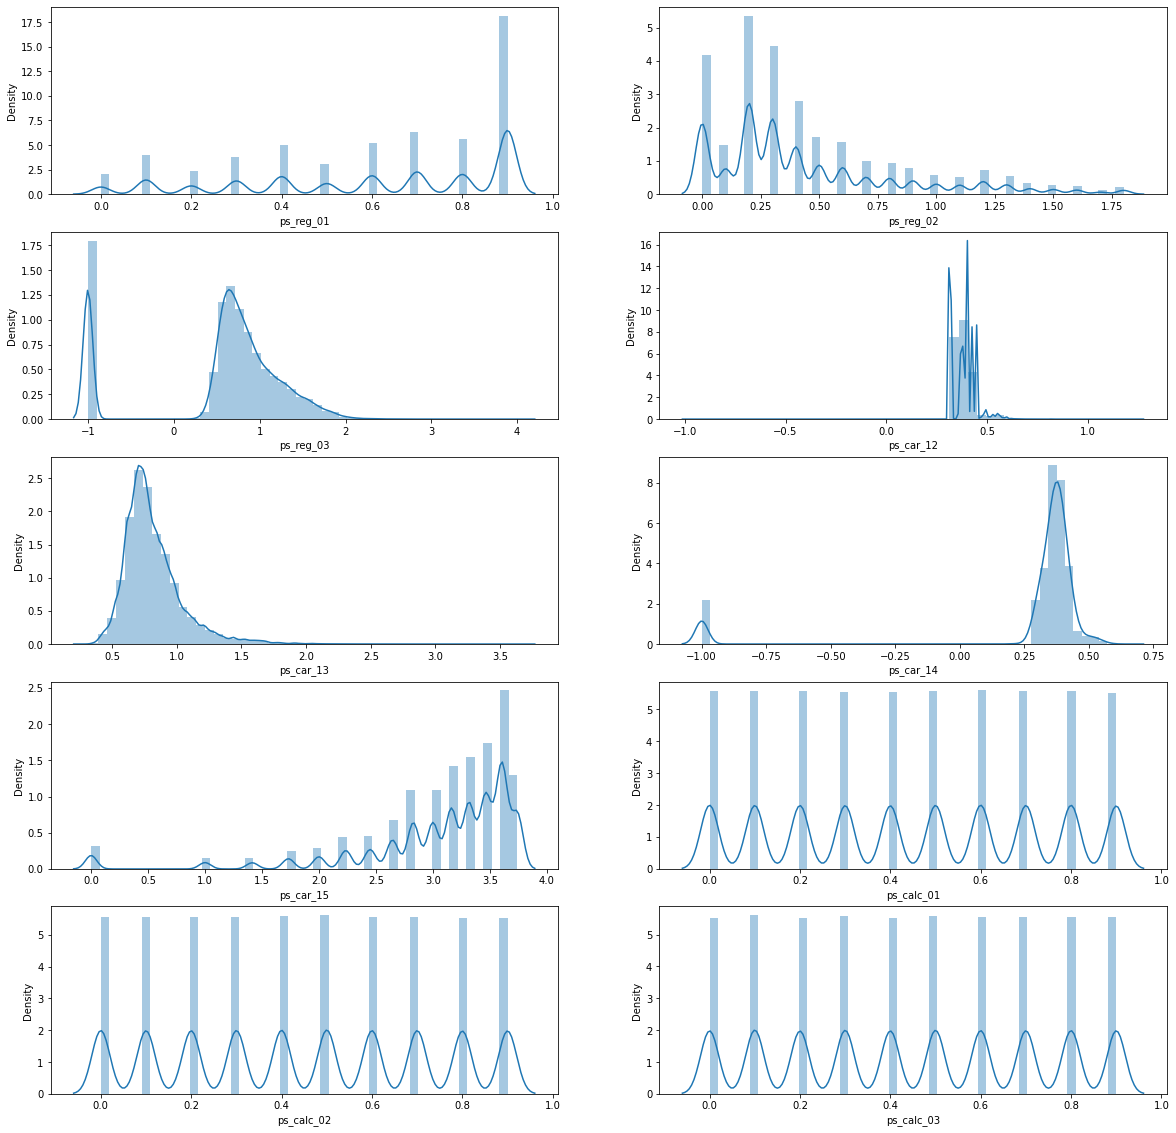

In [75]:
count = 1
plt.figure(figsize=(20,20))
for i in interval_var:
    plt.subplot(5,2,count)
    sns.distplot(data[i])
    count+=1

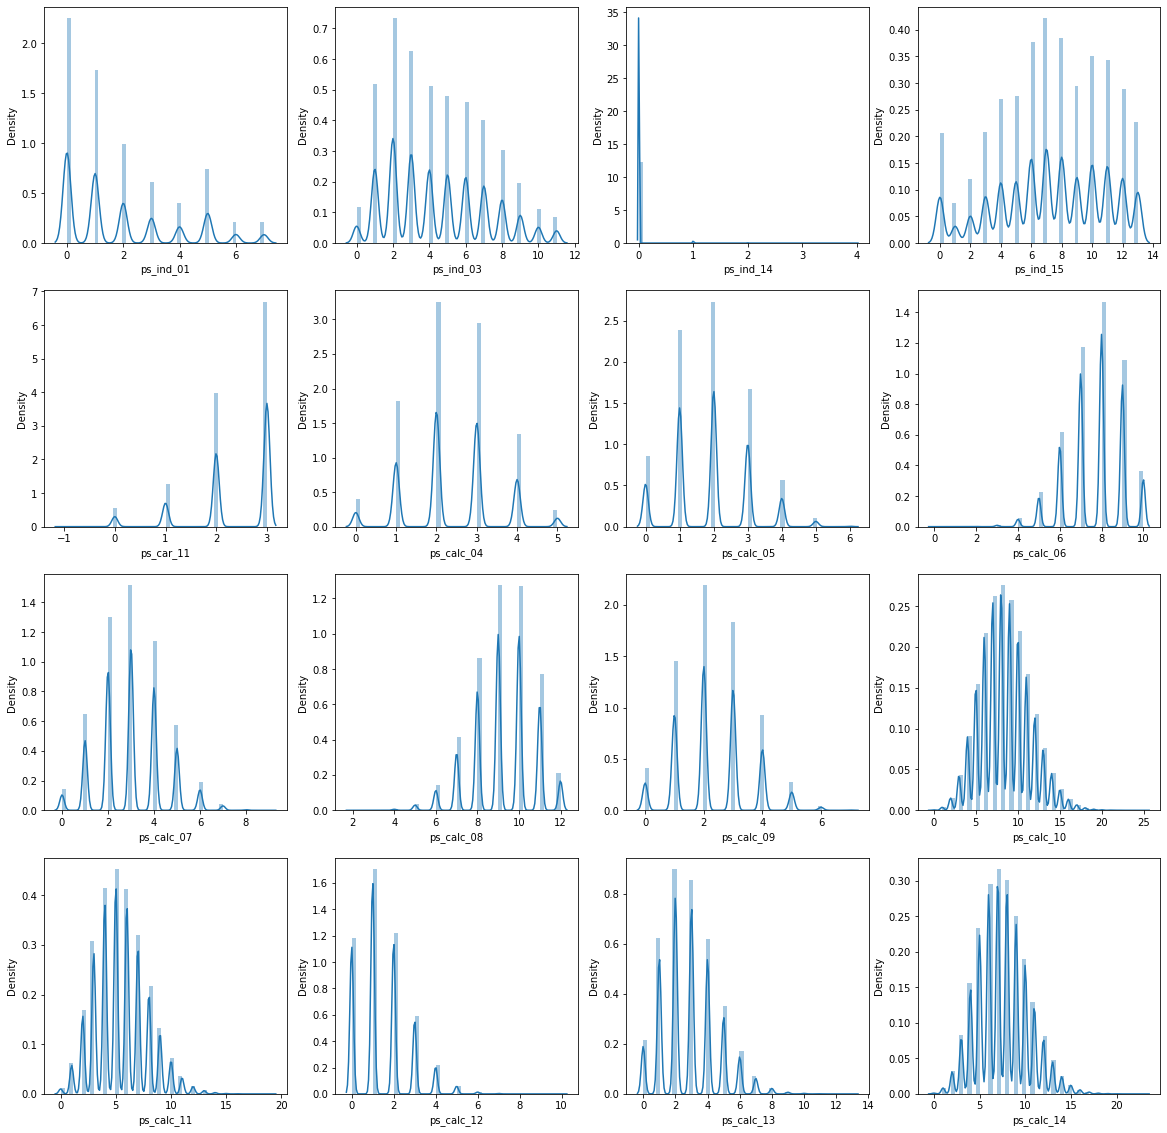

In [76]:
count = 1
plt.figure(figsize=(20,20))
for i in ordinal_var:
    plt.subplot(4,4,count)
    sns.distplot(data[i])
    count+=1

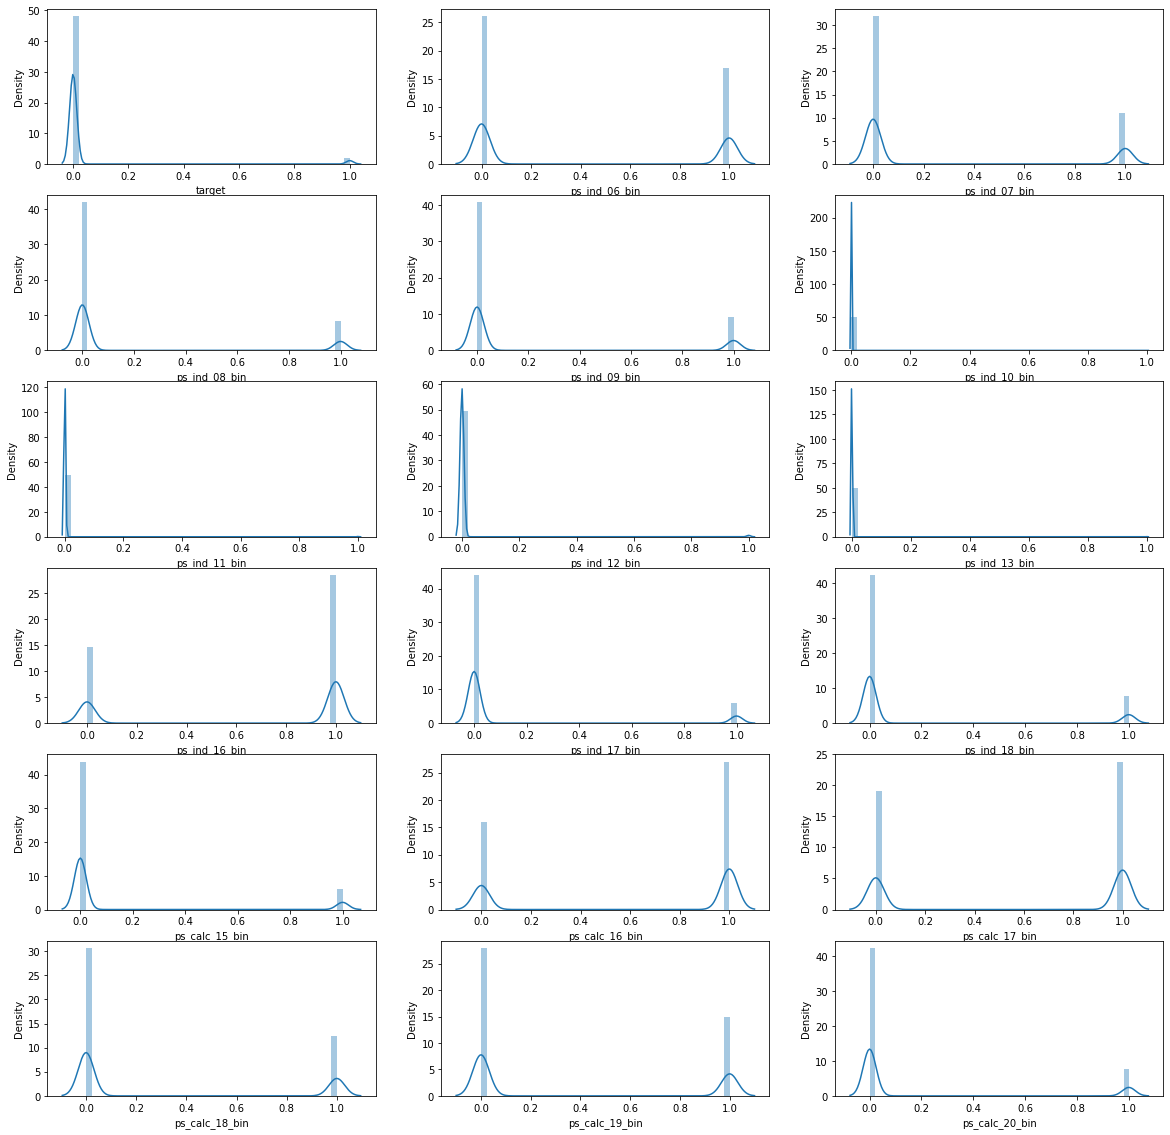

In [77]:
count = 1
plt.figure(figsize=(20,20))
for i in binary_var:
    plt.subplot(6,3,count)
    sns.distplot(data[i])
    count+=1

- In interval variables, ps_reg_02, ps_reg_03, ps_car_12, ps_car_13,ps_car_14 and ps_car_15 have outliers present in them, while remaining are outlier-free. Also, these are the variables that have skewed frequency distribution curve due to the presence of outliers.
- In ordinal variables, except 4 variables, namely, ps_ind_14, ps_ind_03, ps_ind_15, ps_calc_05 all the remaining ordinal variable have atleast one outliers. Hence, we can observe slight skewness in them from the frequency distribution curve.
- In binary variables, since we only have two values (0 and 1), outlier analysis doesn't make much sense.

In [78]:
count = 0
col_with_missing_val = []
for i in null_percetange:
    if null_percetange[i] != 0:
        count+=1
        col_with_missing_val.append(i)
print('Number of Features which have Null Values are {}'.format(count))

Number of Features which have Null Values are 12


In [79]:
col_with_missing_val

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

**Treating the missing Values**

In [80]:
for i in col_with_missing_val:
    data_new[i] = data_new.fillna(data_new[i].median())[i]

In [81]:
data_new.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


Let's check which interval has strong correlation with the target variable.

In [82]:
corr_interval = data_new[interval_var].corr()
corr_wtih_target = data_new[interval_var+['target']].corr().sort_values(
    by = 'target',ascending=False)['target']
corr_wtih_target

target        1.000000
ps_car_13     0.053899
ps_car_12     0.038800
ps_reg_02     0.034800
ps_reg_03     0.033344
ps_car_15     0.027667
ps_reg_01     0.022888
ps_car_14     0.011161
ps_calc_03    0.001907
ps_calc_01    0.001782
ps_calc_02    0.001360
Name: target, dtype: float64

In [83]:
corr_interval

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
ps_reg_01,1.000000,0.471027,0.206868,0.018782,0.027097,-0.001912,0.002765,-0.000891,0.002194,-0.001538
ps_reg_02,0.471027,1.000000,0.728096,0.171453,0.194316,0.053362,0.054510,0.001347,-0.000770,0.000022
ps_reg_03,0.206868,0.728096,1.000000,0.203473,0.238886,0.075862,0.080780,0.000532,-0.000176,0.001517
ps_car_12,0.018782,0.171453,0.203473,1.000000,0.672014,0.577044,0.049740,-0.000721,-0.000393,0.000151
ps_car_13,0.027097,0.194316,0.238886,0.672014,1.000000,0.433587,0.529519,0.000157,0.000040,-0.000200
ps_car_14,-0.001912,0.053362,0.075862,0.577044,0.433587,1.000000,0.008842,-0.003159,-0.001804,-0.001065
ps_car_15,0.002765,0.054510,0.080780,0.049740,0.529519,0.008842,1.000000,0.000344,-0.000252,-0.001043
ps_calc_01,-0.000891,0.001347,0.000532,-0.000721,0.000157,-0.003159,0.000344,1.000000,-0.002418,0.000526
ps_calc_02,0.002194,-0.000770,-0.000176,-0.000393,0.000040,-0.001804,-0.000252,-0.002418,1.000000,0.002948
ps_calc_03,-0.001538,0.000022,0.001517,0.000151,-0.000200,-0.001065,-0.001043,0.000526,0.002948,1.000000


Implementing One Hot Encoding on Categorical Variable

In [84]:
cat_var

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [85]:
one_hot_encoded_df_list = []
for i in cat_var:
    one_hot_encoded_df_list.append(pd.get_dummies(data_new[i],prefix=i))
one_hot_encoded_df = pd.concat(one_hot_encoded_df_list,axis=1)

In [86]:
one_hot_encoded_df.head()

,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_04_cat_1.0,ps_ind_05_cat_0.0,ps_ind_05_cat_1.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,ps_ind_05_cat_4.0,ps_ind_05_cat_5.0,ps_ind_05_cat_6.0,ps_car_01_cat_0.0,ps_car_01_cat_1.0,ps_car_01_cat_2.0,ps_car_01_cat_3.0,ps_car_01_cat_4.0,ps_car_01_cat_5.0,ps_car_01_cat_6.0,ps_car_01_cat_7.0,ps_car_01_cat_8.0,ps_car_01_cat_9.0,ps_car_01_cat_10.0,ps_car_01_cat_11.0,ps_car_02_cat_0,ps_car_02_cat_1,ps_car_03_cat_0.0,ps_car_03_cat_1.0,ps_car_04_cat_0,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_05_cat_0.0,ps_car_05_cat_1.0,ps_car_06_cat_0,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_0.0,ps_car_07_cat_1.0,ps_car_08_cat_0,ps_car_08_cat_1,ps_car_09_cat_0.0,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_0,ps_car_10_cat_1,ps_car_10_cat_2,ps_car_11_cat_1,ps_car_11_cat_2,ps_car_11_cat_3,ps_car_11_cat_4,ps_car_11_cat_5,ps_car_11_cat_6,ps_car_11_cat_7,ps_car_11_cat_8,ps_car_11_cat_9,ps_car_11_cat_10,ps_car_11_cat_11,ps_car_11_cat_12,ps_car_11_cat_13,ps_car_11_cat_14,ps_car_11_cat_15,ps_car_11_cat_16,ps_car_11_cat_17,ps_car_11_cat_18,ps_car_11_cat_19,ps_car_11_cat_20,ps_car_11_cat_21,ps_car_11_cat_22,ps_car_11_cat_23,ps_car_11_cat_24,ps_car_11_cat_25,ps_car_11_cat_26,ps_car_11_cat_27,ps_car_11_cat_28,ps_car_11_cat_29,ps_car_11_cat_30,ps_car_11_cat_31,ps_car_11_cat_32,ps_car_11_cat_33,ps_car_11_cat_34,ps_car_11_cat_35,ps_car_11_cat_36,ps_car_11_cat_37,ps_car_11_cat_38,ps_car_11_cat_39,ps_car_11_cat_40,ps_car_11_cat_41,ps_car_11_cat_42,ps_car_11_cat_43,ps_car_11_cat_44,ps_car_11_cat_45,ps_car_11_cat_46,ps_car_11_cat_47,ps_car_11_cat_48,ps_car_11_cat_49,ps_car_11_cat_50,ps_car_11_cat_51,ps_car_11_cat_52,ps_car_11_cat_53,ps_car_11_cat_54,ps_car_11_cat_55,ps_car_11_cat_56,ps_car_11_cat_57,ps_car_11_cat_58,ps_car_11_cat_59,ps_car_11_cat_60,ps_car_11_cat_61,ps_car_11_cat_62,ps_car_11_cat_63,ps_car_11_cat_64,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [87]:
data_new[cont_ordinal_var]

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,2,5,0,11,0.7,0.2,0.718070,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8
1,1,7,0,3,0.8,0.4,0.766078,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9
2,5,9,0,12,0.0,0.0,0.801561,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7
3,0,2,0,8,0.9,0.2,0.580948,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9
4,0,0,0,9,0.7,0.6,0.840759,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,10,0,13,0.5,0.3,0.692820,3.0,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6
595208,5,3,0,6,0.9,0.7,1.382027,2.0,0.387298,0.972145,0.373497,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8
595209,1,10,0,12,0.9,0.2,0.659071,3.0,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6
595210,5,3,0,12,0.9,0.4,0.698212,3.0,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2


In [88]:
data_new[ordinal_var]

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,2,5,0,11,2.0,3,1,10,1,10,1,5,9,1,5,8
1,1,7,0,3,3.0,2,1,9,5,8,1,7,3,1,1,9
2,5,9,0,12,1.0,2,2,9,1,8,2,7,4,2,7,7
3,0,2,0,8,1.0,2,4,7,1,8,4,2,2,2,4,9
4,0,0,0,9,3.0,2,2,6,3,10,2,12,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,10,0,13,3.0,3,0,9,0,9,1,12,4,1,9,6
595208,5,3,0,6,2.0,2,4,8,6,8,2,12,4,1,3,8
595209,1,10,0,12,3.0,3,2,7,4,8,0,10,3,2,2,6
595210,5,3,0,12,3.0,4,0,9,4,9,2,11,4,1,4,2


In [89]:
data_new[interval_var]

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
0,0.7,0.2,0.718070,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2
1,0.8,0.4,0.766078,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3
2,0.0,0.0,0.801561,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1
3,0.9,0.2,0.580948,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1
4,0.7,0.6,0.840759,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...
595207,0.5,0.3,0.692820,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3
595208,0.9,0.7,1.382027,0.387298,0.972145,0.373497,3.605551,0.2,0.2,0.0
595209,0.9,0.2,0.659071,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3
595210,0.9,0.4,0.698212,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0


It is clear from the above that ordinal features have heigher values as compared to interval features. So we can apply StandardScaling on ordinal features.

In [90]:
scaled_new_data = data_new.copy()
sc = StandardScaler()
scaled_new_data[ordinal_var] = sc.fit_transform(data[ordinal_var])

In [91]:
scaled_new_data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,0.050218,2.0,0.213594,1.0,0.0,0,1,0,0,0,0,0,0,-0.097621,1.043440,0,1,0,0.7,0.2,0.718070,10.0,1,1.0,0,1.0,4,1.0,0,0.0,1,12,-0.415678,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,0.562038,-0.780567,1.731646,-1.417981,0.530322,-1.073849,-1.182124,1.525425,-0.367359,1.255372,0.167831,0,1,1,0,0,1
1,9,0,-0.453868,1.0,0.954362,0.0,0.0,0,0,1,0,0,0,0,0,-0.097621,-1.212598,0,0,1,0.8,0.4,0.766078,11.0,1,1.0,0,1.0,11,1.0,1,2.0,1,19,0.785455,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,-0.333042,-0.780567,0.982196,1.409748,-0.839850,-1.073849,-0.493559,-1.046515,-0.367359,-1.104669,0.531911,0,1,1,0,1,0
2,13,0,1.562477,4.0,1.695130,1.0,0.0,0,0,1,0,0,0,0,0,-0.097621,1.325445,1,0,0,0.0,0.0,0.801561,7.0,1,1.0,0,1.0,14,1.0,1,2.0,1,60,-1.616811,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,-0.333042,0.100547,0.982196,-1.417981,-0.839850,-0.271891,-0.493559,-0.617858,0.463923,2.435393,-0.196249,0,1,1,0,1,0
3,16,0,-0.957955,1.0,-0.897559,0.0,0.0,1,0,0,0,0,0,0,0,-0.097621,0.197425,1,0,0,0.9,0.2,0.580948,7.0,1,0.0,0,1.0,11,1.0,1,3.0,1,104,-1.616811,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,-0.333042,1.862777,-0.516705,-1.417981,-0.839850,1.332025,-2.214970,-1.475171,0.463923,0.665362,0.531911,0,0,0,0,0,0
4,17,0,-0.957955,2.0,-1.638327,1.0,0.0,1,0,0,0,0,0,0,0,-0.097621,0.479430,1,0,0,0.7,0.6,0.840759,11.0,1,1.0,0,1.0,14,1.0,1,2.0,1,82,0.785455,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,-0.333042,0.100547,-1.266155,-0.004117,0.530322,-0.271891,1.227851,-1.046515,-0.367359,-1.104669,-1.652569,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,0.554304,1.0,2.065514,0.0,0.0,0,0,0,1,0,0,0,0,-0.097621,1.607449,1,0,0,0.5,0.3,0.692820,10.0,1,1.0,0,1.0,1,1.0,1,0.0,1,31,0.785455,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,0.562038,-1.661682,0.982196,-2.124913,-0.154764,-1.073849,1.227851,-0.617858,-0.367359,3.615414,-0.560329,0,1,1,0,1,1
595208,1488016,0,1.562477,1.0,-0.527174,0.0,0.0,0,0,0,1,0,0,0,0,-0.097621,-0.366584,1,0,0,0.9,0.7,1.382027,9.0,1,1.0,0,1.0,15,0.0,0,2.0,1,63,-0.415678,0.387298,0.972145,0.373497,3.605551,0.2,0.2,0.0,-0.333042,1.862777,0.232745,2.116680,-0.839850,-0.271891,1.227851,-0.617858,-0.367359,0.075352,0.167831,1,0,1,0,1,1
595209,1488017,0,-0.453868,1.0,2.065514,0.0,0.0,1,0,0,0,0,0,0,0,-0.097621,1.325445,1,0,0,0.9,0.2,0.659071,7.0,1,1.0,0,1.0,1,1.0,1,2.0,1,31,0.785455,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,0.562038,0.100547,-0.516705,0.702816,-0.839850,-1.875807,0.539287,-1.046515,0.463923,-0.514659,-0.560329,0,0,1,0,0,0
595210,1488021,0,1.562477,2.0,-0.527174,1.0,0.0,0,0,1,0,0,0,0,0,-0.097621,1.325445,1,0,0,0.9,0.4,0.698212,11.0,1,1.0,0,1.0,11,1.0,1,2.0,1,101,0.785455,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,1.457119,-1.661682,0.982196,0.702816,-0.154764,-0.271891,0.883569,-0.617858,-0.367359,0.665362,-2.016649,0,1,1,1,0,0


In [92]:
X = scaled_new_data.drop('target', axis = 1)
Y = scaled_new_data['target']

Let's talk about the target variable now.
It is clear from above that the data is imbalance. As target 1 is 4% of the whole data while the target 0 is almost 96% of the data. For this, we will use SMOTE(Synthetic Minority Oversampling Technique) to balance the data.  
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [93]:
oversample = SMOTE(sampling_strategy=0.12)
X, Y = oversample.fit_resample(X,Y)

In [94]:
Counter(Y)

Counter({0: 573518, 1: 68822})

Now the data seems balanced.


In [95]:
one_hot_encoded_df

,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_04_cat_1.0,ps_ind_05_cat_0.0,ps_ind_05_cat_1.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,ps_ind_05_cat_4.0,ps_ind_05_cat_5.0,ps_ind_05_cat_6.0,ps_car_01_cat_0.0,ps_car_01_cat_1.0,ps_car_01_cat_2.0,ps_car_01_cat_3.0,ps_car_01_cat_4.0,ps_car_01_cat_5.0,ps_car_01_cat_6.0,ps_car_01_cat_7.0,ps_car_01_cat_8.0,ps_car_01_cat_9.0,ps_car_01_cat_10.0,ps_car_01_cat_11.0,ps_car_02_cat_0,ps_car_02_cat_1,ps_car_03_cat_0.0,ps_car_03_cat_1.0,ps_car_04_cat_0,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_05_cat_0.0,ps_car_05_cat_1.0,ps_car_06_cat_0,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_0.0,ps_car_07_cat_1.0,ps_car_08_cat_0,ps_car_08_cat_1,ps_car_09_cat_0.0,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_0,ps_car_10_cat_1,ps_car_10_cat_2,ps_car_11_cat_1,ps_car_11_cat_2,ps_car_11_cat_3,ps_car_11_cat_4,ps_car_11_cat_5,ps_car_11_cat_6,ps_car_11_cat_7,ps_car_11_cat_8,ps_car_11_cat_9,ps_car_11_cat_10,ps_car_11_cat_11,ps_car_11_cat_12,ps_car_11_cat_13,ps_car_11_cat_14,ps_car_11_cat_15,ps_car_11_cat_16,ps_car_11_cat_17,ps_car_11_cat_18,ps_car_11_cat_19,ps_car_11_cat_20,ps_car_11_cat_21,ps_car_11_cat_22,ps_car_11_cat_23,ps_car_11_cat_24,ps_car_11_cat_25,ps_car_11_cat_26,ps_car_11_cat_27,ps_car_11_cat_28,ps_car_11_cat_29,ps_car_11_cat_30,ps_car_11_cat_31,ps_car_11_cat_32,ps_car_11_cat_33,ps_car_11_cat_34,ps_car_11_cat_35,ps_car_11_cat_36,ps_car_11_cat_37,ps_car_11_cat_38,ps_car_11_cat_39,ps_car_11_cat_40,ps_car_11_cat_41,ps_car_11_cat_42,ps_car_11_cat_43,ps_car_11_cat_44,ps_car_11_cat_45,ps_car_11_cat_46,ps_car_11_cat_47,ps_car_11_cat_48,ps_car_11_cat_49,ps_car_11_cat_50,ps_car_11_cat_51,ps_car_11_cat_52,ps_car_11_cat_53,ps_car_11_cat_54,ps_car_11_cat_55,ps_car_11_cat_56,ps_car_11_cat_57,ps_car_11_cat_58,ps_car_11_cat_59,ps_car_11_cat_60,ps_car_11_cat_61,ps_car_11_cat_62,ps_car_11_cat_63,ps_car_11_cat_64,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [96]:
one_hot_encoded_scaled_data = pd.concat([one_hot_encoded_df,scaled_new_data],axis=1)
one_hot_encoded_scaled_data = one_hot_encoded_scaled_data.drop(cat_var,axis=1)

print(one_hot_encoded_scaled_data.shape)
one_hot_encoded_scaled_data.head()

(595212, 220)


,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_04_cat_1.0,ps_ind_05_cat_0.0,ps_ind_05_cat_1.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,ps_ind_05_cat_4.0,ps_ind_05_cat_5.0,ps_ind_05_cat_6.0,ps_car_01_cat_0.0,ps_car_01_cat_1.0,ps_car_01_cat_2.0,ps_car_01_cat_3.0,ps_car_01_cat_4.0,ps_car_01_cat_5.0,ps_car_01_cat_6.0,ps_car_01_cat_7.0,ps_car_01_cat_8.0,ps_car_01_cat_9.0,ps_car_01_cat_10.0,ps_car_01_cat_11.0,ps_car_02_cat_0,ps_car_02_cat_1,ps_car_03_cat_0.0,ps_car_03_cat_1.0,ps_car_04_cat_0,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_05_cat_0.0,ps_car_05_cat_1.0,ps_car_06_cat_0,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_0.0,ps_car_07_cat_1.0,ps_car_08_cat_0,ps_car_08_cat_1,ps_car_09_cat_0.0,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_0,ps_car_10_cat_1,ps_car_10_cat_2,ps_car_11_cat_1,ps_car_11_cat_2,ps_car_11_cat_3,ps_car_11_cat_4,ps_car_11_cat_5,ps_car_11_cat_6,ps_car_11_cat_7,ps_car_11_cat_8,ps_car_11_cat_9,ps_car_11_cat_10,ps_car_11_cat_11,ps_car_11_cat_12,ps_car_11_cat_13,ps_car_11_cat_14,ps_car_11_cat_15,ps_car_11_cat_16,ps_car_11_cat_17,ps_car_11_cat_18,ps_car_11_cat_19,ps_car_11_cat_20,ps_car_11_cat_21,ps_car_11_cat_22,ps_car_11_cat_23,ps_car_11_cat_24,ps_car_11_cat_25,ps_car_11_cat_26,ps_car_11_cat_27,ps_car_11_cat_28,ps_car_11_cat_29,ps_car_11_cat_30,ps_car_11_cat_31,ps_car_11_cat_32,ps_car_11_cat_33,ps_car_11_cat_34,ps_car_11_cat_35,ps_car_11_cat_36,ps_car_11_cat_37,ps_car_11_cat_38,ps_car_11_cat_39,ps_car_11_cat_40,ps_car_11_cat_41,ps_car_11_cat_42,ps_car_11_cat_43,ps_car_11_cat_44,ps_car_11_cat_45,ps_car_11_cat_46,ps_car_11_cat_47,ps_car_11_cat_48,ps_car_11_cat_49,ps_car_11_cat_50,ps_car_11_cat_51,ps_car_11_cat_52,ps_car_11_cat_53,ps_car_11_cat_54,ps_car_11_cat_55,ps_car_11_cat_56,ps_car_11_cat_57,ps_car_11_cat_58,ps_car_11_cat_59,ps_car_11_cat_60,ps_car_11_cat_61,ps_car_11_cat_62,ps_car_11_cat_63,ps_car_11_cat_64,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0.050218,0.213594,0,1,0,0,0,0,0,0,-0.097621,1.043440,0,1,0,0.7,0.2,0.718070,-0.415678,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2

The data has very high number of features, making PCA suitable for dealing with it.
# Modeling
### Dimensionality Reduction using PCA

In [97]:
X_before_pca = one_hot_encoded_scaled_data.drop(['id','target'],axis = 1)
Y_before_pca = one_hot_encoded_scaled_data['target']
pca = PCA()
X_after_pca = pca.fit_transform(X_before_pca)

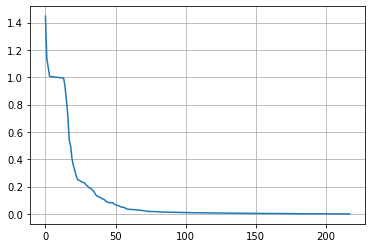

In [98]:
plt.plot(pca.explained_variance_)
plt.grid()

It is clear from above that 50 features can be used.

In [99]:
pca = PCA(50)
X_after_pca = pca.fit_transform(X_before_pca)
Y = one_hot_encoded_scaled_data['target']
col_list = ['PCA'+str(i+1) for i in range(X_after_pca.shape[1])]
X_after_pca_df = pd.DataFrame(data = X_after_pca, columns=col_list)
print(X_after_pca_df.shape)
X_after_pca_df.head()

(595212, 50)


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
0,-0.521768,-0.215921,-0.255480,-2.000797,0.743685,-1.116277,-0.745647,-0.503097,0.064371,1.186751,0.637423,-2.053685,-0.432788,0.215406,-0.213809,0.836431,-1.277477,-0.810829,0.448180,-0.433534,0.654498,0.325403,0.665183,1.347063,-0.337307,-0.127747,-0.382110,0.246092,-0.413604,0.582853,-0.300071,0.043957,0.168218,-0.478542,0.021360,0.528798,-0.100259,0.841345,0.397997,0.610344,-0.429895,-0.123224,0.144221,0.105904,-0.778478,-0.145744,-0.070274,0.239648,-0.096623,0.785922
1,0.346883,0.320767,0.588772,1.370337,-1.502913,-0.720216,-0.818865,0.353036,-1.254466,0.499414,1.117033,0.025036,-0.242304,-0.277345,0.157853,-1.683007,0.828144,0.495864,0.441009,0.082396,0.139398,0.445439,-0.604727,0.441279,-0.422220,-0.163568,-0.415885,-0.685898,0.747975,0.284143,-0.287758,-0.573726,0.735121,-0.066780,0.332611,-0.503145,-0.529082,-0.133538,-0.142951,-0.459695,0.027497,-0.117582,-0.180571,0.135290,0.123730,-0.204068,-0.233009,-0.059736,0.274742,0.033391
2,-2.650671,0.884208,-0.554958,-1.452567,0.728907,1.045397,-1.110726,0.677063,-0.369662,0.728105,0.384975,-1.151070,1.522927,0.939434,0.307527,0.793802,-0.257716,0.231794,0.618527,-1.592035,-0.303420,-0.019142,0.746697,-0.157348,-0.455946,-0.000121,-0.386103,-0.007451,0.656320,-0.259299,-0.292082,0.121274,0.812944,0.373790,0.329476,-0.332066,0.083784,-0.154390,1.011352,-0.133110,-0.028058,-0.130895,-0.138858,0.090972,-0.004543,-0.028581,-0.176868,0.274896,-0.272362,-0.277287
3,0.785283,0.771321,-1.941438,-0.562084,-1.135919,1.876236,1.225147,0.021992,1.135451,0.743093,0.864023,-0.175003,1.999929,1.765408,0.791551,0.647646,1.092666,0.194884,-0.118064,0.607530,-0.505468,-0.515892,0.157854,-0.131093,0.513409,0.385357,0.646232,-0.481997,-0.293406,-0.140987,-0.280915,-0.051458,-0.558108,-0.514160,0.582591,0.891152,0.113860,-0.160858,0.132756,-0.091109,-0.045269,-0.134695,-0.379120,0.216533,0.125414,0.283686,-0.074187,0.960789,0.070307,0.000996
4,1.303377,-1.610359,-0.396237,0.073708,-0.340673,0.590989,1.278235,0.767840,-1.278234,-0.674850,-1.363533,1.132306,-0.475225,-0.941526,0.143932,1.156930,1.115027,0.174476,0.889862,0.278591,0.258924,0.517088,-0.255113,-0.007812,0.551742,0.272123,0.660419,0.534900,0.593101,0.108932,0.705926,0.352253,0.332873,-0.122369,0.200571,-0.437049,0.403604,-0.172022,0.776746,0.035621,-0.019481,-0.120694,0.079854,0.154881,0.191523,-0.205173,-0.328380,-0.072033,-0.497336,-0.282240


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_after_pca_df, Y, test_size=0.2, random_state=0)
X_train

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
24433,-0.045038,-0.945616,0.125102,0.153660,2.183332,-0.225910,0.549334,-1.058284,0.813205,0.819516,-1.005620,-1.057488,-0.462178,-0.298413,-0.405640,0.744183,0.256167,-1.227818,0.189933,0.035275,0.428116,-0.321700,-0.358488,0.850406,-0.391621,-0.994278,-0.460206,-0.556708,0.719788,0.309096,0.721045,0.256629,-0.259118,0.567503,-0.278969,0.413260,0.544637,-0.175159,-0.312347,0.366096,-0.283717,-0.130054,0.078303,-0.827845,0.183963,-0.380178,-0.288490,0.057147,-0.162291,-0.188546
227637,-0.036134,0.959201,-1.220301,-1.641360,-0.395826,0.996693,1.247528,0.807725,-0.373424,1.164667,1.881137,0.025720,1.500402,0.563833,0.619433,0.033433,0.106450,1.023342,-0.091270,-0.014369,-0.127734,0.289287,-0.933943,1.090648,-0.412904,0.127312,0.569652,-0.462136,-0.287014,-0.359883,-0.285838,0.272951,-0.033158,-0.514584,-0.239369,-0.225451,-0.234434,-0.155766,-0.009052,0.541798,-0.368549,-0.128183,-0.201747,-0.149942,-0.023999,-0.080427,0.173530,0.506301,-0.339706,-0.023589
245461,0.536606,-0.410875,0.297094,0.445992,1.329229,-0.384768,1.205440,-1.007663,-0.479135,0.091395,-0.117578,-1.567056,1.336916,0.046049,0.596672,-1.177101,-0.060604,0.420871,0.323061,-0.054433,0.437185,-0.049771,-0.408771,-0.739361,-0.480884,-0.600178,0.634188,0.283542,-0.399813,0.141019,0.723766,-0.787128,0.349424,-0.522601,-0.646280,-0.078739,-0.434773,-0.144367,-0.023617,0.165093,-0.170309,-0.116757,-0.065988,-0.089900,-0.040902,-0.125427,-0.461102,-0.231239,0.395843,-0.111209
325281,-0.552148,3.503310,-0.398003,-1.052014,-1.390867,-0.562582,0.645030,1.627354,1.059307,-0.576839,-0.965876,0.051238,-0.162623,0.609148,-1.455503,-0.643275,-0.707305,0.428791,0.639513,-1.739926,-1.347175,0.362028,0.632991,0.083592,-0.468357,0.419822,-0.399815,-0.502067,0.748200,-0.500768,-0.293581,0.154185,0.793236,0.139106,0.271968,-0.645281,0.228714,-0.150766,-0.380150,-0.561957,-0.009015,-0.125337,-0.339970,0.302642,0.062569,0.444039,0.233132,-0.376436,-0.253162,0.118886
378468,-1.539149,-0.127873,1.360533,-0.459878,2.368233,0.510102,1.850990,-1.032651,0.299605,1.113100,0.938368,0.636551,0.995269,1.134173,-0.684184,-0.522636,-1.471713,-0.785050,0.322840,1.012879,-0.339330,-0.759955,0.676772,-0.599145,0.526183,0.395355,-0.319505,0.039818,-0.346590,-0.345205,0.698775,0.126573,0.063511,-0.340251,-0.155587,-0.392288,0.559495,-0.145385,-0.257586,-0.055180,-0.130930,0.886621,0.101941,0.044906,-0.047707,0.134499,0.181568,-0.262875,0.531545,-0.132899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,0.714902,-0.977499,-0.137083,-0.316566,-0.298316,-0.342157,0.750761,-1.159248,0.976158,-0.960011,-0.237160,0.468167,0.284610,0.941842,0.376018,0.395290,1.506801,0.502749,0.132069,0.849940,-0.314915,0.376223,-0.513962,-0.725011,0.524261,-0.828879,-0.385657,-0.473685,0.712928,0.783459,-0.285359,-0.019336,-0.346742,0.305504,-0.102340,1.093807,0.010725,-0.164940,-0.217614,0.246911,1.034053,-0.130454,0.041586,-0.075445,-0.208299,0.321362,-0.336398,-0.207822,-0.197908,-0.127891
152315,-0.592464,-1.096769,0.016616,-0.691091,-0.548123,0.929836,0.016601,-0.037241,0.337349,-1.061922,-1.783353,-0.966221,0.611992,-1.282799,0.883571,0.239593,0.431979,-0.290972,0.271511,-0.916181,-0.322577,-0.634992,-0.166936,0.172871,0.515421,0.788647,0.635687,-0.609094,-0.254630,-0.474337,-0.290202,0.133984,-0.093275,-0.336715,0.074254,-0.201511,0.159152,-0.154460,-0.217370,-0.184392,-0.139499,-0.122833,-0.006812,0.060470,0.039752,-0.011750,0.251462,0.378413,-0.473360,-0.037414
117952,0.661024,-0.968631,-0.459122,1.687056,0.638766,0.437079,2.291022,-1.297030,-0.507690,-0.441299,-0.909166

In [101]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [102]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Train Accuracy Score', accuracy_score(y_train, y_train_pred))
print('Test Accuracy Score', accuracy_score(y_test, y_test_pred))
print('Train F1 Score', f1_score(y_train, y_train_pred))
print('Test F1 Score', f1_score(y_test, y_test_pred))

Train Accuracy Score 0.9634940535818165
Test Accuracy Score 0.9637861949043622
Train F1 Score 0.0
Test F1 Score 0.0


Although the Accuracy Score of the model is quite good but it's still a blunder as F1 Score should not be 0. This means that the model is unable to clasify the minority classe (1). We can have a look at confusion matrix for a clear picture

In [103]:
confusion_matrix(y_train, y_train_pred)

array([[458786,      0],
       [ 17383,      0]], dtype=int64)

In [104]:
confusion_matrix(y_test, y_test_pred)

array([[114732,      0],
       [  4311,      0]], dtype=int64)

In [105]:
print('Train precision score:',precision_score(y_train, y_train_pred))
print('Train recall score:',recall_score(y_train,y_train_pred))
print('Test precision score:',precision_score(y_test,y_test_pred))
print('Test recall score:',recall_score(y_test,y_test_pred))

Train precision score: 0.0
Train recall score: 0.0
Test precision score: 0.0
Test recall score: 0.0


The model is not good for the prediction so now trying the weighted Cost Function to overcome the difficulties

In [106]:
weighted_lr = LogisticRegression(class_weight='balanced')
weighted_lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [107]:
y_train_pred1 = weighted_lr.predict(X_train)
y_test_pred1 = weighted_lr.predict(X_test)
print('Train Accuracy Score', accuracy_score(y_train, y_train_pred1))
print('Test Accuracy Score', accuracy_score(y_test, y_test_pred1))
print('Train F1 Score', f1_score(y_train, y_train_pred1))
print('Test F1 Score', f1_score(y_test, y_test_pred1))

Train Accuracy Score 0.6171170319781422
Test Accuracy Score 0.6160295019446754
Train F1 Score 0.09609368415311925
Test F1 Score 0.09359693826964645


In [108]:
confusion_matrix(y_train,y_train_pred1)

array([[284161, 174625],
       [  7692,   9691]], dtype=int64)

In [109]:
confusion_matrix(y_test, y_test_pred1)

array([[70974, 43758],
       [ 1951,  2360]], dtype=int64)

Oversampling the minority class

In [110]:
oversampler = SMOTE(sampling_strategy=0.2)
X, y_oversampled = oversampler.fit_resample(X_after_pca_df,Y)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y_oversampled, test_size=0.2, random_state=0)

In [112]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [113]:
y_train_pred2 = log_reg.predict(X_train)
y_test_pred2 = log_reg.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train, y_train_pred2))
print('Train F1 score:',f1_score(y_train, y_train_pred2))
print('Test accuracy score:',accuracy_score(y_test,y_test_pred2))
print('Test F1 score:',f1_score(y_test,y_test_pred2))

Train accuracy score: 0.5872922176048356
Train F1 score: 0.31551328897149417
Test accuracy score: 0.5880634966762324
Test F1 score: 0.3166825341351426


In [114]:
confusion_matrix(y_train, y_train_pred2)

array([[270979, 187782],
       [ 39445,  52370]], dtype=int64)

Trying the oversampling of minority class and undersampling of majority class.

In [115]:
oversampler = SMOTE(sampling_strategy=0.2)
undersampler = RandomUnderSampler(sampling_strategy=0.7)
X, Y_sample = oversampler.fit_resample(X_after_pca_df,Y)
X, Y_sample = undersampler.fit_resample(X, Y_sample)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_sample, test_size=0.2, random_state=0)

In [117]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [118]:
y_train_pred3 = log_reg.predict(X_train)
y_test_pred3 = log_reg.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train, y_train_pred3))
print('Train F1 score:',f1_score(y_train, y_train_pred3))
print('Test accuracy score:',accuracy_score(y_test,y_test_pred3))
print('Test F1 score:',f1_score(y_test,y_test_pred3))

Train accuracy score: 0.5838340415793513
Train F1 score: 0.5313430120621959
Test accuracy score: 0.5870263672751422
Test F1 score: 0.5352106985576341


F1 score has improved a lot here. With more tuning to find optimum sampling strategy, we can definitely achieve a model with more F1-score and accuracy. The F1 score has improved because we are removing the imbalance through data augumentation of minority class(target 1). So, the model is easily able to identify discernible patterns, which are available more due to large amount of such minority data, resulting in better segregation.

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_after_pca_df, Y, test_size=0.2, random_state=0)

In [120]:
lnr_svc = LinearSVC()
lnr_svc.fit(X_train, y_train)

LinearSVC()

In [124]:
y_train_pred4 = lnr_svc.predict(X_train)
y_test_pred4 = lnr_svc.predict(X_test)
print('Train Accuracy Score is',accuracy_score(y_train,y_train_pred4))
print('Test Accuracy Score is',accuracy_score(y_test, y_test_pred4))
print('Train F1 Score is', f1_score(y_train,y_train_pred4))
print('Test F1 Score is',f1_score(y_test, y_test_pred4))

Train Accuracy Score is 0.9634940535818165
Test Accuracy Score is 0.9637861949043622
Train F1 Score is 0.0
Test F1 Score is 0.0


Again the F1 Score is 0, so the model is of no use.

In [126]:
oversampler = SMOTE(sampling_strategy=0.3)
undersampler = RandomUnderSampler(sampling_strategy=0.5)
X,Y_over_under = oversampler.fit_resample(X_after_pca_df,Y)
X,Y_over_under = undersampler.fit_resample(X,Y_over_under)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,Y_over_under,test_size=0.2,random_state=0)

In [128]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [132]:
y_train_pred5 = ada_boost.predict(X_train)
y_test_pred5 = ada_boost.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train, y_train_pred5))
print('Train F1 score:',f1_score(y_train, y_train_pred5))
print('Test accuracy score:',accuracy_score(y_test,y_test_pred5))
print('Test F1 score:',f1_score(y_test,y_test_pred5))

Train accuracy score: 0.8808811135973962
Train F1 score: 0.7863824686661282
Test accuracy score: 0.8803580250501293
Test F1 score: 0.78559152851315


Trying the MLPClassifier for the above dataset

In [136]:
param = {'hidden_layer_sizes':[(100,),(20,20,),(20,20,20,)],'random_state':[0]}
mlp = MLPClassifier()
mlp_gridsearch = GridSearchCV(mlp,param_grid=param,n_jobs=-1,scoring='f1')
mlp_gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(100,), (20, 20), (20, 20, 20)],
                         'random_state': [0]},
             scoring='f1')

In [137]:
print('Best param for MLP is',mlp_gridsearch.best_params_)

Best param for MLP is {'hidden_layer_sizes': (100,), 'random_state': 0}


In [138]:
mlp = MLPClassifier(hidden_layer_sizes=(100,),random_state=0)
mlp.fit(X_train,y_train)
y_train_pred6 = mlp.predict(X_train)
y_test_pred6 = mlp.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train, y_train_pred6))
print('Train F1 score:',f1_score(y_train, y_train_pred6))
print('Test accuracy score:',accuracy_score(y_test,y_test_pred6))
print('Test F1 score:',f1_score(y_test,y_test_pred6))

Train accuracy score: 0.9206649036645259
Train F1 score: 0.8718670796958602
Test accuracy score: 0.9130994933790552
Test F1 score: 0.8599309881805549


MLP Classifier does have a good F1-score and accuracy score compared to AdaBoost Classifier and also very good accuracy score of more than 90%.